In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import requests

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
res = requests.get("https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt")
text = res.text.lower()
split_lines = text.split("\n")

In [4]:
# Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(split_lines)
total_words = len(tokenizer.word_index) + 1

In [40]:
a = tokenizer.texts_to_sequences(["Hello my name is Vu"])[0]
a

[2102, 7, 449, 23]

In [5]:
input_sequences = []
for line in split_lines:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre'))

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
# Architect model
model = Sequential()
model.add(Embedding(total_words, 240, input_length=max_sequence_length-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Train
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
377/377 [==============================] - 10s 11ms/step - loss: 6.7428 - accuracy: 0.0650
Epoch 2/100
377/377 [==============================] - 4s 10ms/step - loss: 6.1981 - accuracy: 0.0783
Epoch 3/100
377/377 [==============================] - 4s 11ms/step - loss: 5.8544 - accuracy: 0.0993
Epoch 4/100
377/377 [==============================] - 4s 10ms/step - loss: 5.4879 - accuracy: 0.1180
Epoch 5/100
377/377 [==============================] - 4s 10ms/step - loss: 5.1146 - accuracy: 0.1363
Epoch 6/100
377/377 [==============================] - 4s 11ms/step - loss: 4.7355 - accuracy: 0.1596
Epoch 7/100
377/377 [==============================] - 4s 9ms/step - loss: 4.3523 - accuracy: 0.1933
Epoch 8/100
377/377 [==============================] - 4s 10ms/step - loss: 3.9616 - accuracy: 0.2358
Epoch 9/100
377/377 [==============================] - 4s 10ms/step - loss: 3.5560 - accuracy: 0.2940
Epoch 10/100
377/377 [==============================] - 4s 10ms/step - loss: 3.165

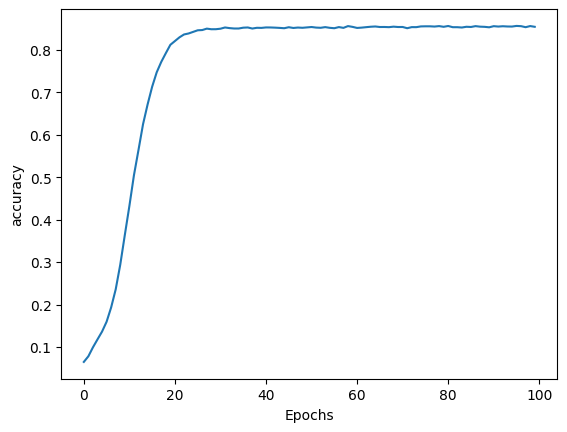

In [8]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [20]:
text = "I've got up"
token_list = tokenizer.texts_to_sequences([text])[0]
token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
yhat = np.argmax(model.predict(token_list))
for word, index in tokenizer.word_index.items():
    if index == yhat:
        print(word)
        break

1/1 [==============================] - 0s 16ms/step
from


In [21]:
seed_text = "I've got a bad feeling about this"
next_words = 20
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 14ms/step
I've got a bad feeling about this water is a stone youd sash of our friend bride us remark to stand your bubblin bubblin bubblin bubblin keep
